In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
import xgboost as xgb

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, RandomizedSearchCV, GridSearchCV

%matplotlib inline

In [52]:
X = pd.read_csv('/content/X_train_J01Z4CN.csv')
y = pd.read_csv('/content/y_train_OXxrJt1.csv')

In [53]:
X = X.set_index('id_annonce')
y = y.set_index('id_annonce')

In [10]:
X.head()

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y.head()

,price
id_annonce,
35996577,355000.0
35811033,190000.0
35731841,39000.0
35886765,299000.0
35781137,478000.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37368 entries, 35996577 to 35748883
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                37368 non-null  object 
 1   approximate_latitude         37368 non-null  float64
 2   approximate_longitude        37368 non-null  float64
 3   city                         37368 non-null  object 
 4   postal_code                  37368 non-null  int64  
 5   size                         36856 non-null  float64
 6   floor                        9743 non-null   float64
 7   land_size                    15581 non-null  float64
 8   energy_performance_value     19068 non-null  float64
 9   energy_performance_category  19068 non-null  object 
 10  ghg_value                    18530 non-null  float64
 11  ghg_category                 18530 non-null  object 
 12  exposition                   9094 non-null   object 
 13  nb_roo

In [14]:
X.describe()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
count,37368.000000,37368.000000,37368.000000,36856.000000,9743.000000,1.558100e+04,19068.000000,18530.000000,35802.000000,34635.000000,...,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000
mean,46.546155,2.619087,53598.371655,1088.831615,3.479524,3.995665e+03,205.385148,31.845548,4.245405,2.864877,...,0.293486,0.179699,7.979153,0.148282,0.309596,0.200145,0.053870,0.039847,0.003827,0.000241
std,2.356581,2.597060,28807.220527,5555.320867,6.725577,5.441595e+04,790.501769,310.576209,2.987782,2.156517,...,0.455365,0.383942,4.646145,0.355384,0.462333,0.400114,0.225763,0.195602,0.061744,0.015518
min,41.374436,-4.733545,1000.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.921547,1.096014,30150.000000,74.000000,1.000000,3.620000e+02,125.000000,8.000000,3.000000,2.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.939440,2.380793,59000.000000,115.000000,2.000000,7.950000e+02,180.000000,16.000000,4.000000,3.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.841511,4.624248,78210.000000,235.250000,4.000000,1.841000e+03,239.000000,36.000000,5.000000,4.000000,...,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.075892,9.503198,95880.000000,411311.000000,55.000000,6.203700e+06,100000.000000,17024.000000,130.000000,118.000000,...,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
 X.shape

(37368, 26)

In [16]:
for col in X.columns:
    print(f"Le total de valeurs uniques dans {col} est {len(X[col].unique())}")

Le total de valeurs uniques dans property_type est 22
Le total de valeurs uniques dans approximate_latitude est 37368
Le total de valeurs uniques dans approximate_longitude est 37368
Le total de valeurs uniques dans city est 8643
Le total de valeurs uniques dans postal_code est 4726
Le total de valeurs uniques dans size est 4479
Le total de valeurs uniques dans floor est 25
Le total de valeurs uniques dans land_size est 3722
Le total de valeurs uniques dans energy_performance_value est 643
Le total de valeurs uniques dans energy_performance_category est 8
Le total de valeurs uniques dans ghg_value est 189
Le total de valeurs uniques dans ghg_category est 8
Le total de valeurs uniques dans exposition est 13
Le total de valeurs uniques dans nb_rooms est 45
Le total de valeurs uniques dans nb_bedrooms est 45
Le total de valeurs uniques dans nb_bathrooms est 5
Le total de valeurs uniques dans nb_parking_places est 2
Le total de valeurs uniques dans nb_boxes est 2
Le total de valeurs unique

<Axes: ylabel='id_annonce'>

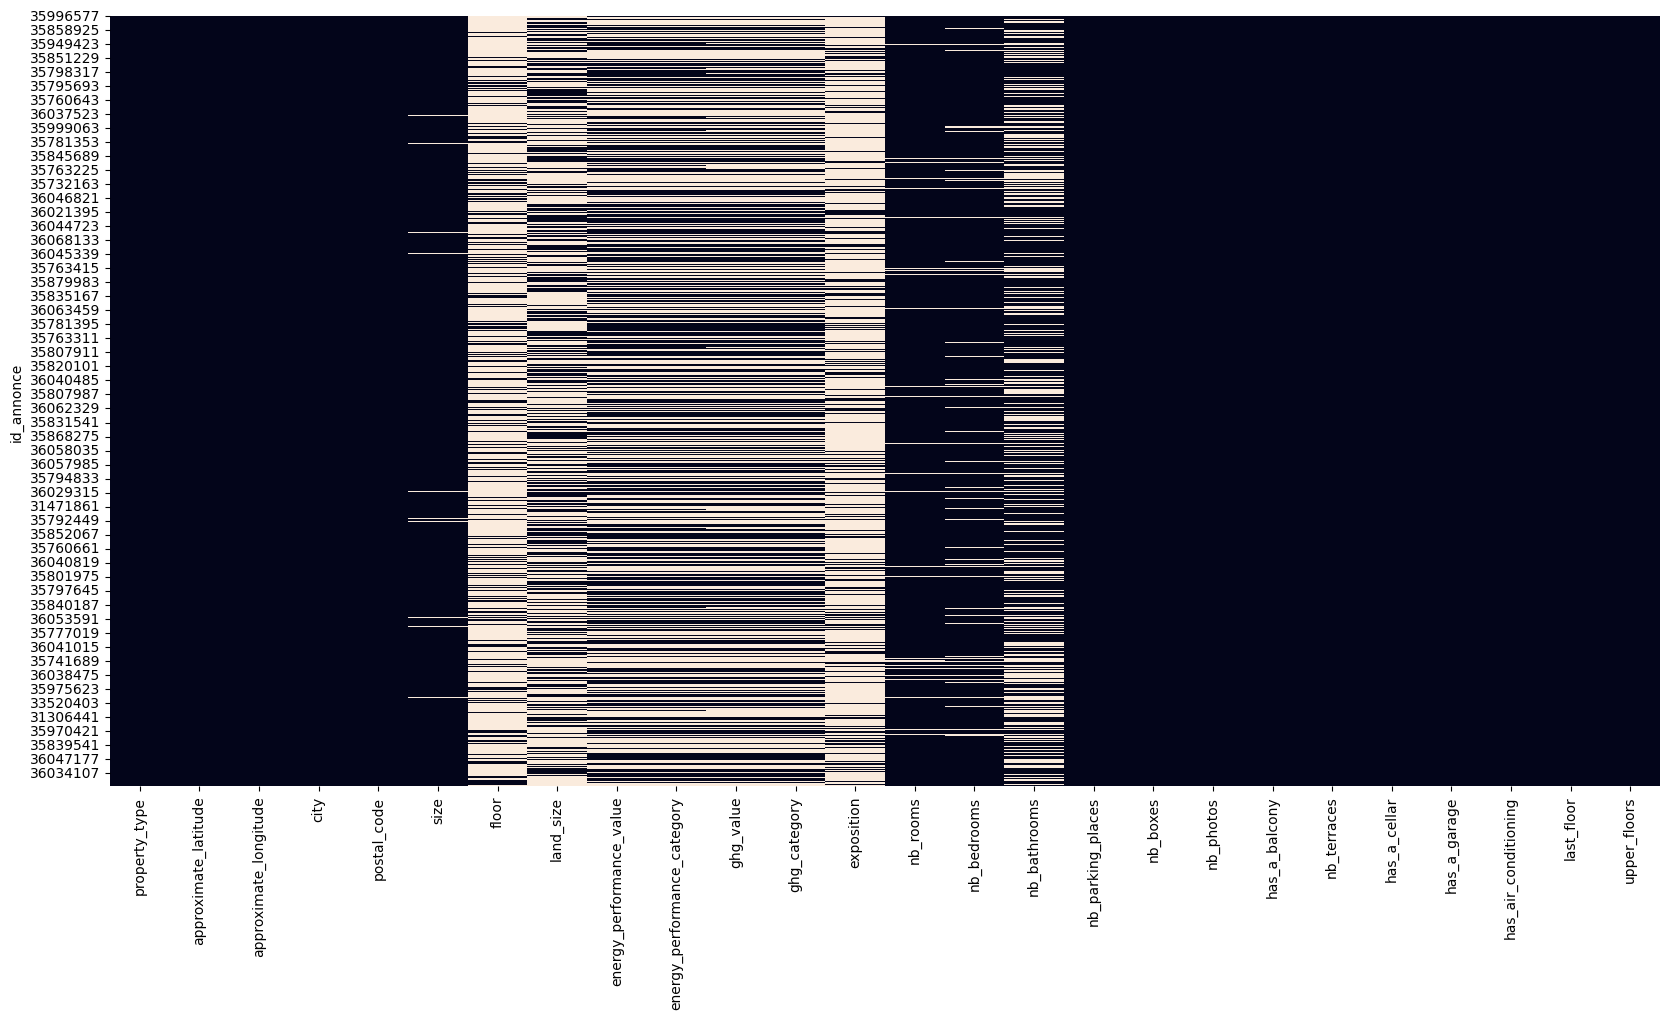

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(X.isna(), cbar=False)

In [18]:
(X.isnull().sum() / X.shape[0]) * 100

property_type                   0.000000
approximate_latitude            0.000000
approximate_longitude           0.000000
city                            0.000000
postal_code                     0.000000
size                            1.370156
floor                          73.926889
land_size                      58.303896
energy_performance_value       48.972383
energy_performance_category    48.972383
ghg_value                      50.412117
ghg_category                   50.412117
exposition                     75.663669
nb_rooms                        4.190751
nb_bedrooms                     7.313744
nb_bathrooms                   35.519696
nb_parking_places               0.000000
nb_boxes                        0.000000
nb_photos                       0.000000
has_a_balcony                   0.000000
nb_terraces                     0.000000
has_a_cellar                    0.000000
has_a_garage                    0.000000
has_air_conditioning            0.000000
last_floor      

In [23]:
categorical_features = ['property_type','city','postal_code', 'exposition']

In [24]:
numeric_features = ['size','energy_performance_value','nb_rooms','nb_bedrooms','nb_bathrooms',
           'nb_parking_places','nb_boxes','nb_terraces', 'nb_photos', 'approximate_latitude',
            'approximate_longitude', 'floor', 'land_size']

In [25]:
ordinal_features = ['energy_performance_category', 'ghg_category']
ordre1 = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
ordre2 = ['G', 'F', 'E', 'D', 'C', 'B', 'A']

In [26]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

<Axes: xlabel='price', ylabel='Density'>

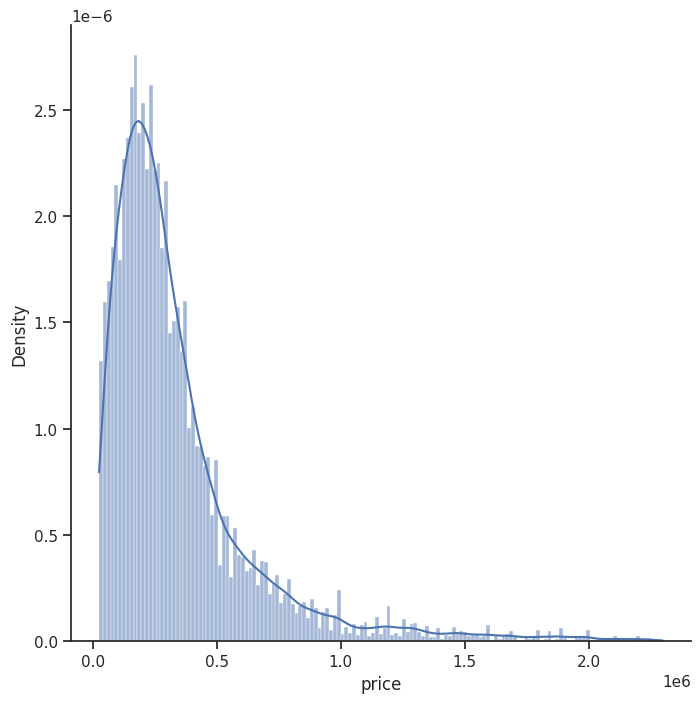

In [54]:
plt.figure(figsize=(8,8))
sns.histplot(data=y, x='price', kde=True, stat="density")

<Axes: ylabel='price'>

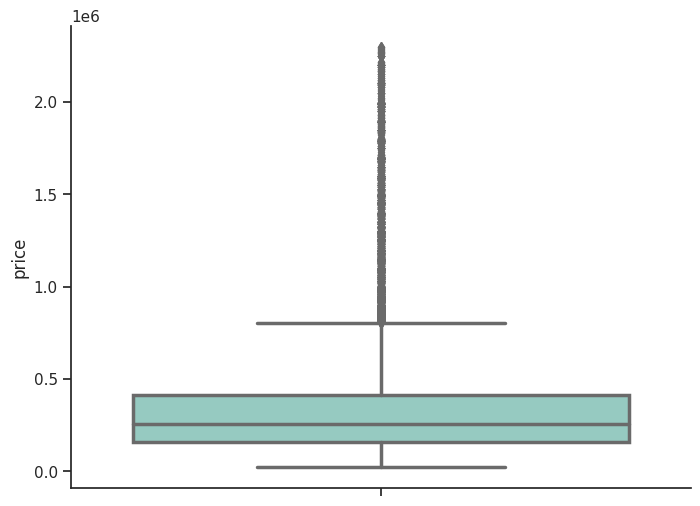

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(y='price', data=y, palette="Set3", linewidth=2.5)

In [25]:
df = pd.concat([X, y], axis=1)

In [26]:
df.head()

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0


Text(0.5, 0, '')

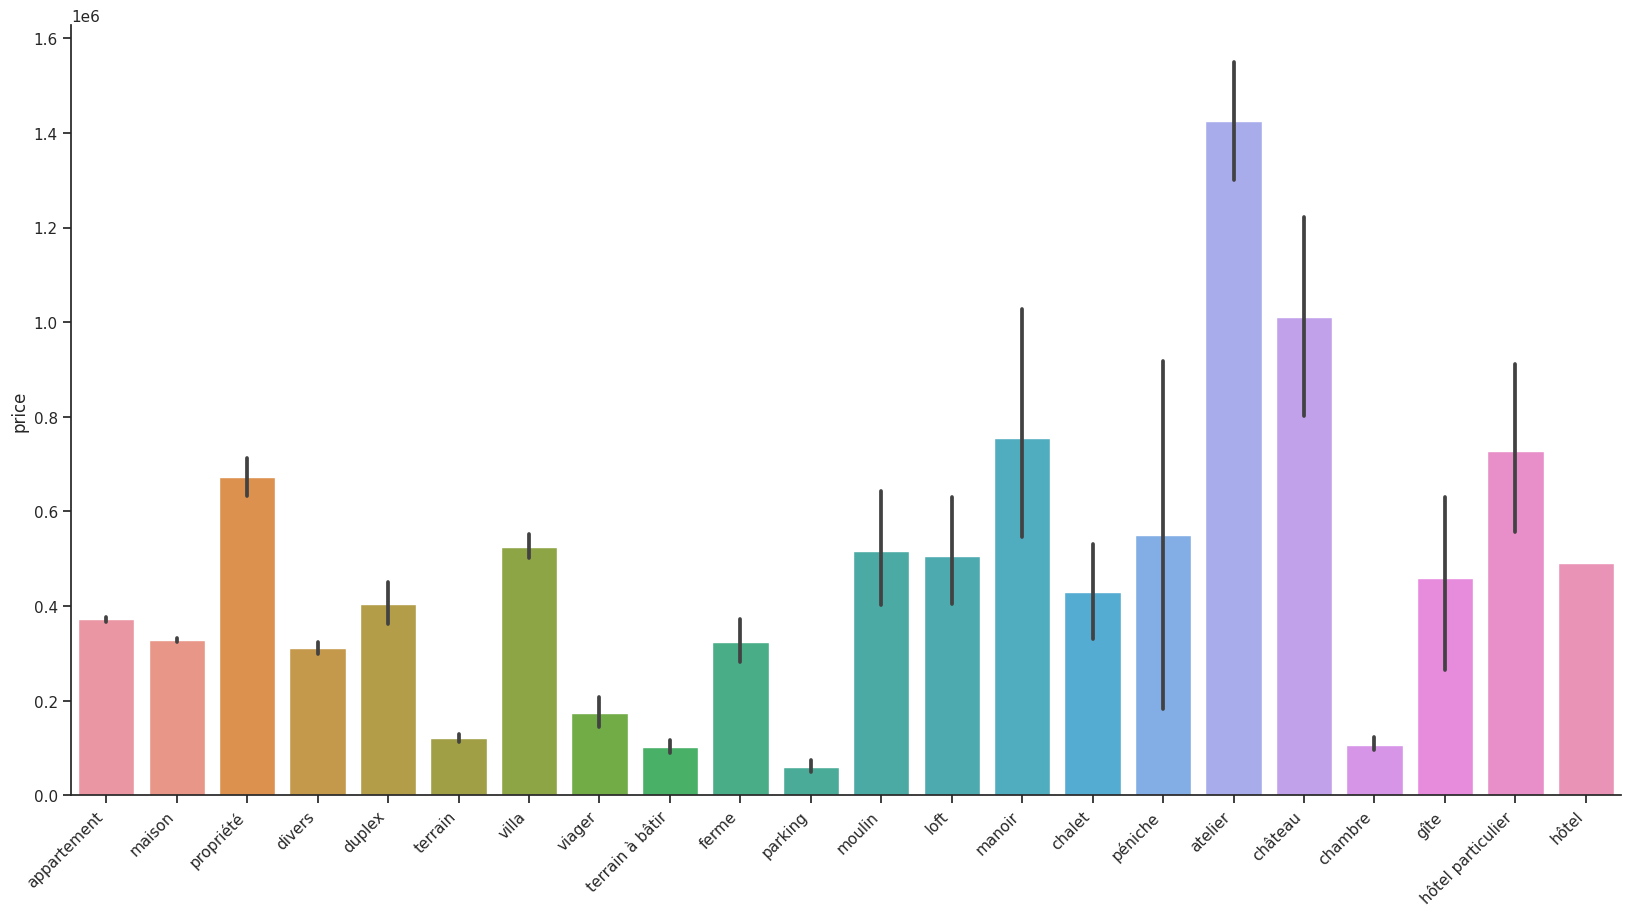

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_type', y='price', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')

In [36]:
var_num = ['size','nb_rooms','nb_bedrooms','nb_bathrooms',
           'nb_parking_places','nb_boxes','nb_photos','nb_terraces', 'price']
           
var_cat = ['has_a_balcony','has_a_cellar','has_a_garage',
           'has_air_conditioning', 'last_floor', 'upper_floors']

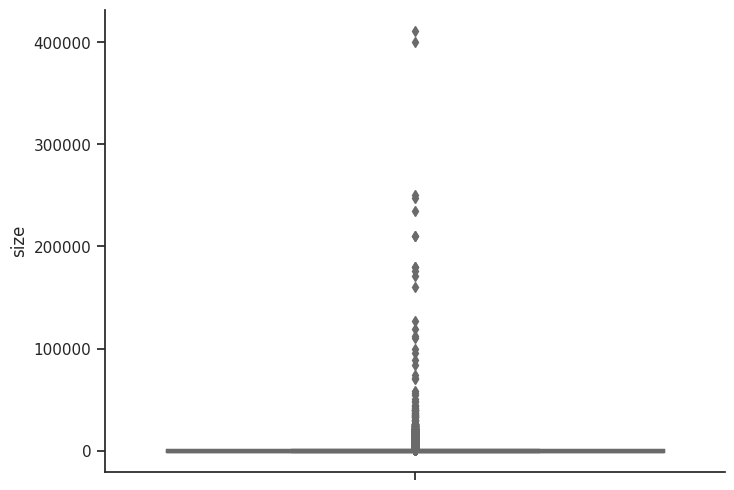

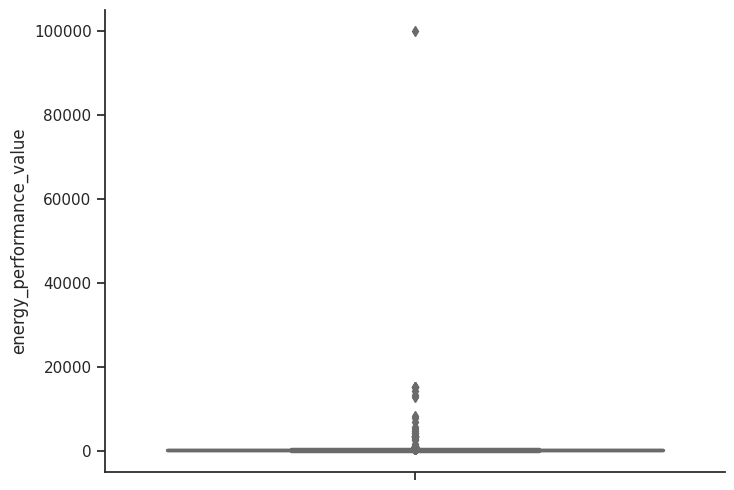

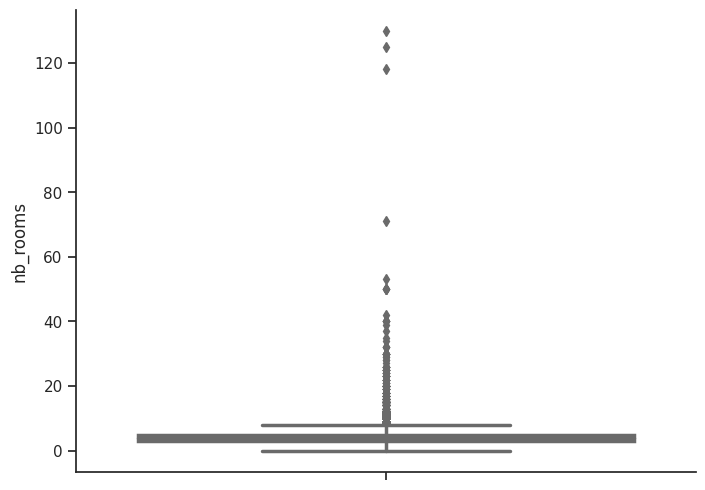

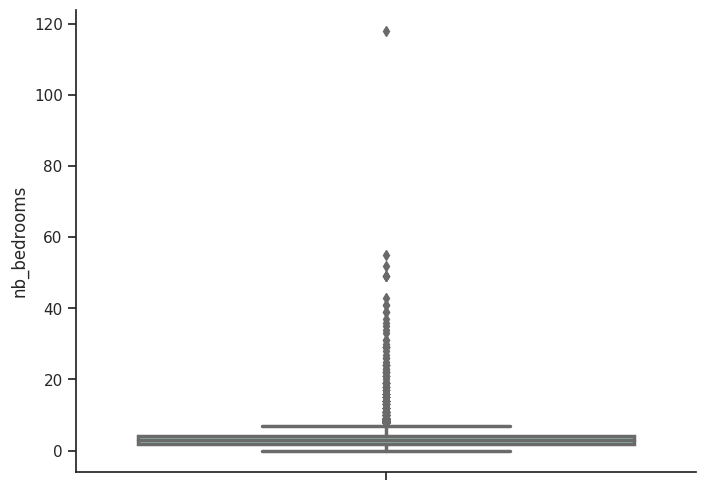

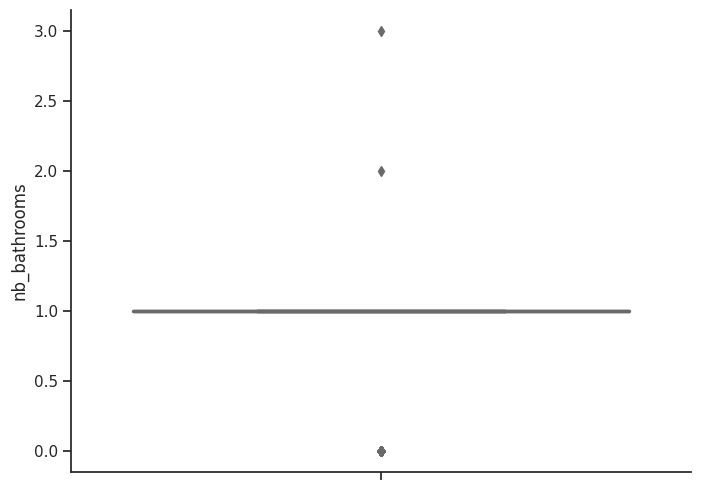

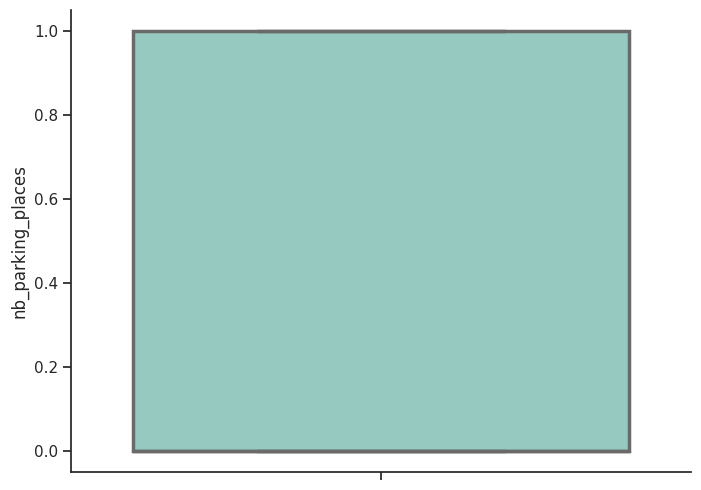

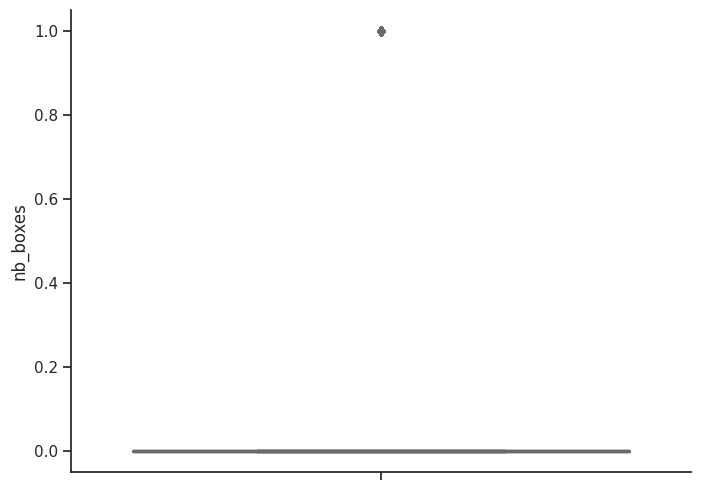

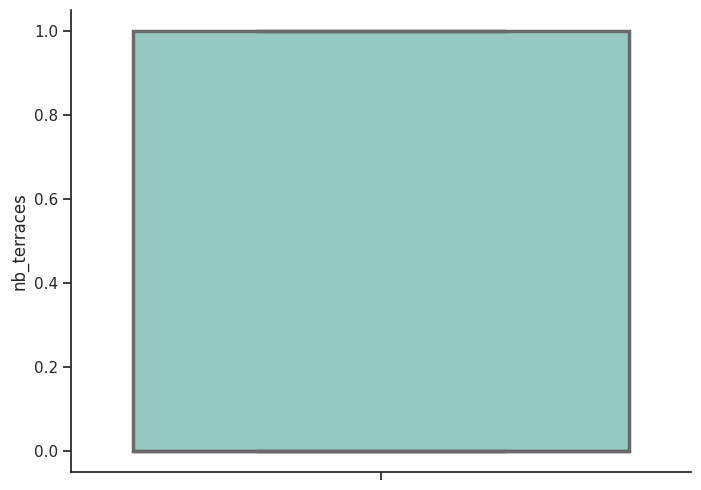

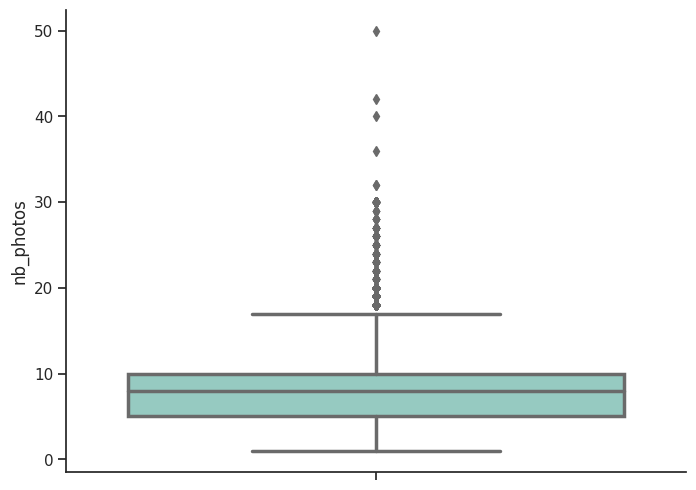

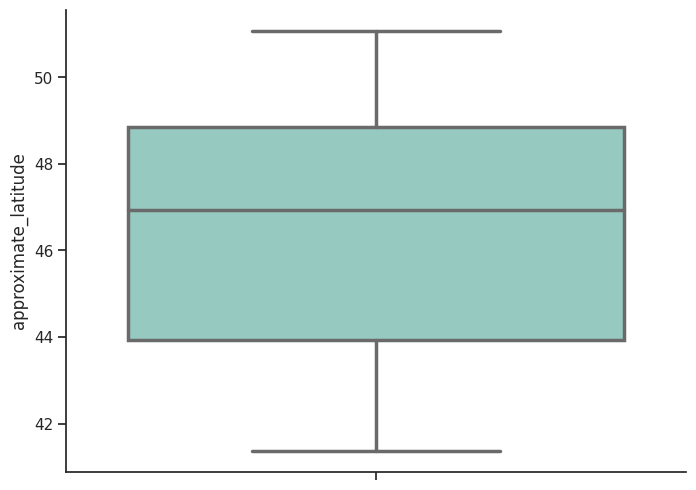

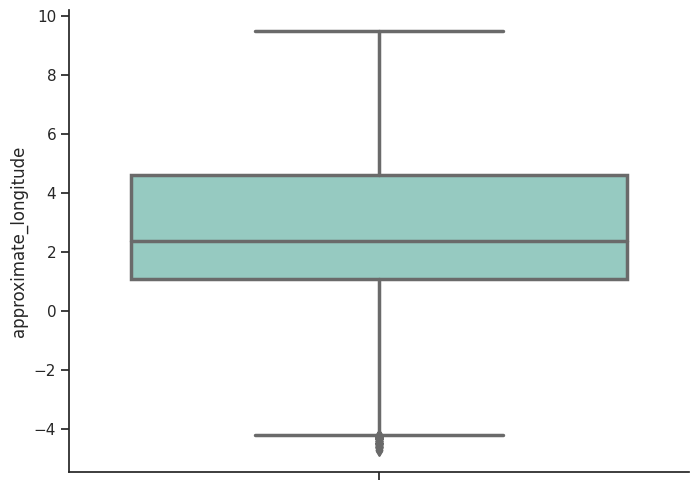

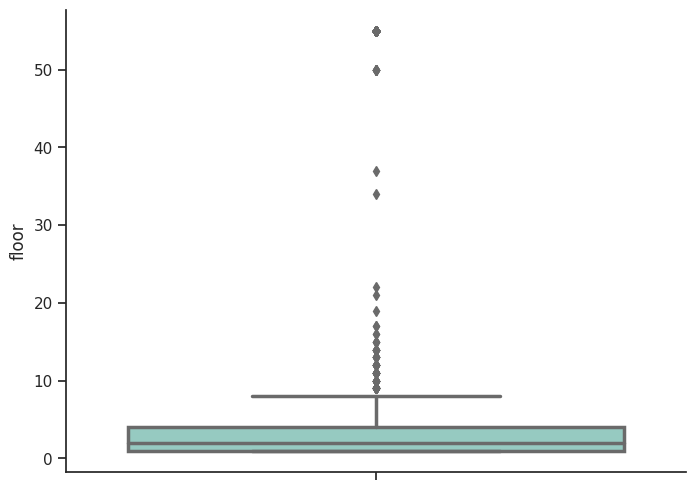

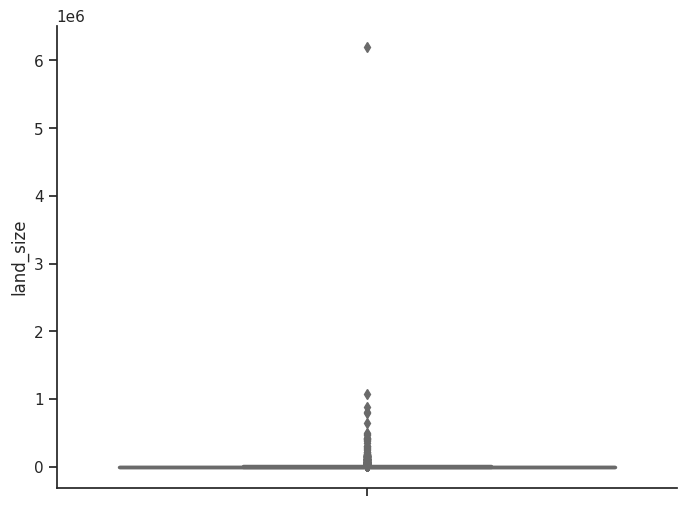

In [37]:
for i, col in enumerate(numeric_features):
    plt.figure(i,figsize=(8,6))
    sns.boxplot(y=col, data=df, palette="Set3", linewidth=2.5)

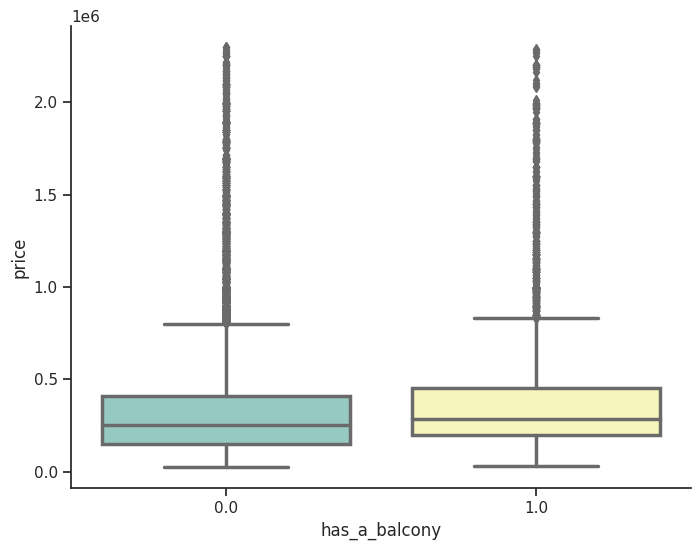

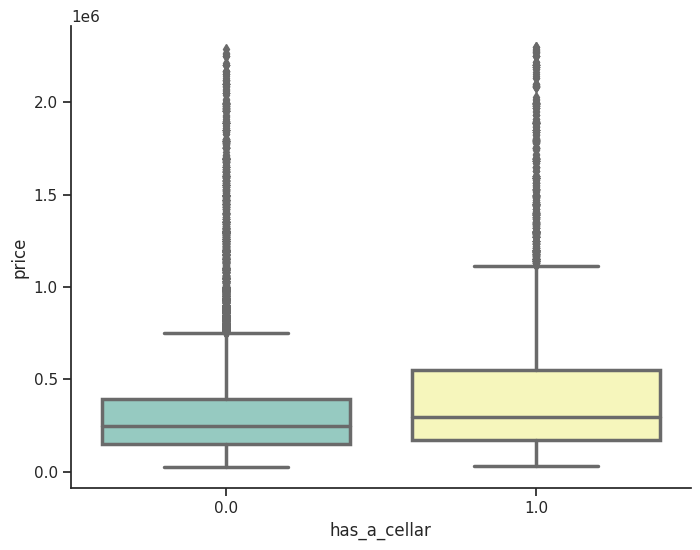

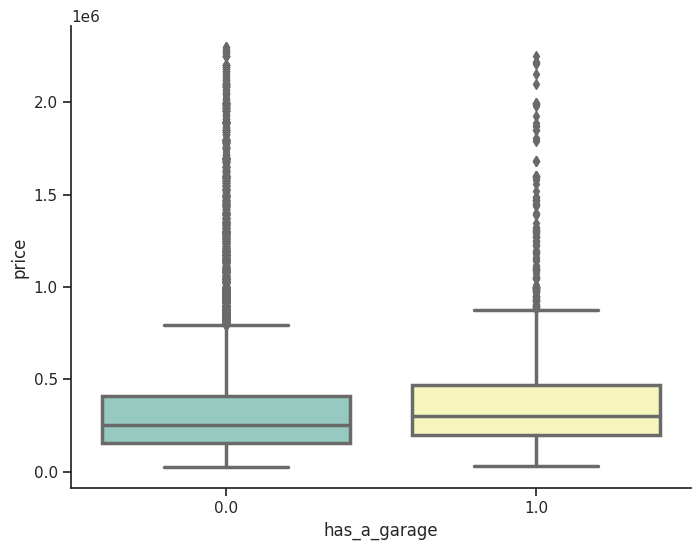

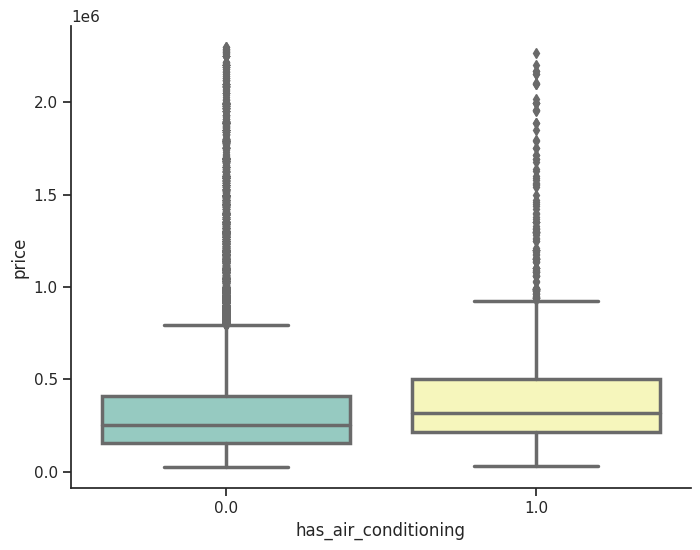

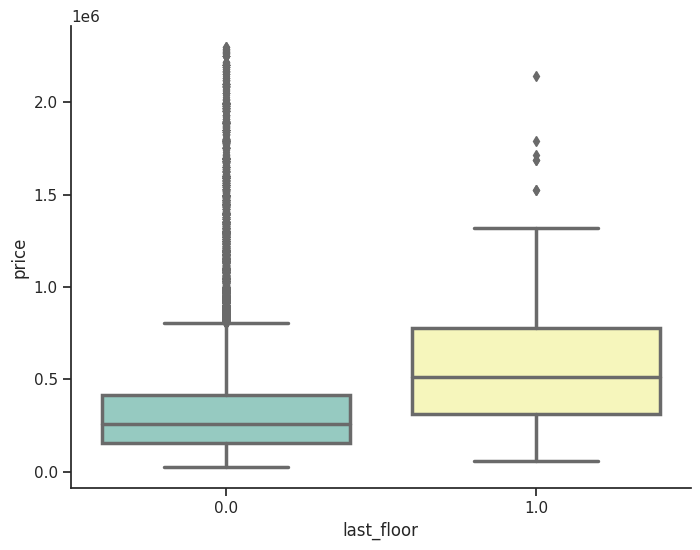

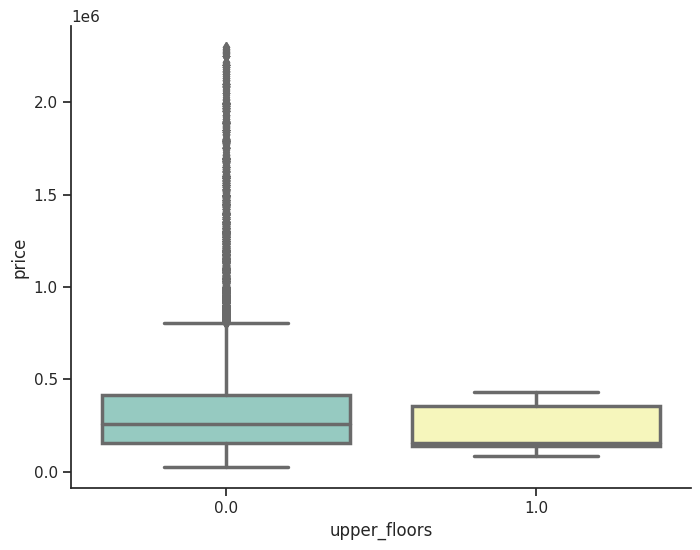

In [38]:
for i, col in enumerate(var_cat):
    plt.figure(i,figsize=(8,6))
    sns.boxplot(x=col, y='price', data=df, palette="Set3", linewidth=2.5)

<Axes: >

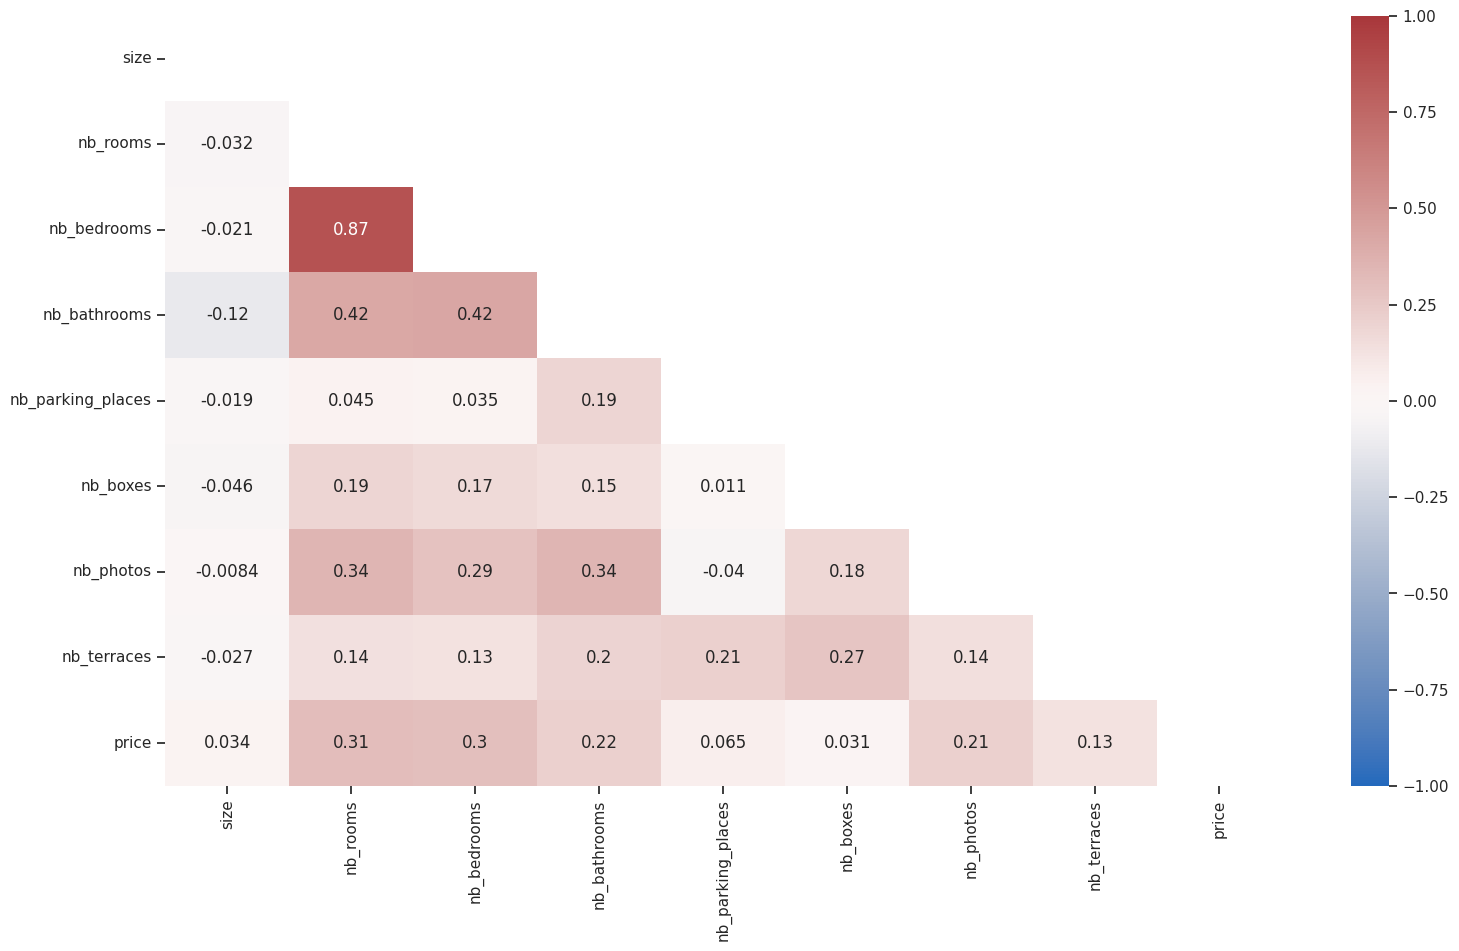

In [39]:
plt.figure(figsize=(18,10))
sns.heatmap(df[var_num].corr(), vmin=-1, vmax=1, annot=True,
            mask=np.triu(df[var_num].corr()), cmap=sns.color_palette("vlag", as_cmap=True))

In [7]:
def pipeline(model):
    numeric_transformer  = Pipeline(steps=[
                         ('imputer', SimpleImputer(strategy='median')),
                         #('robust_scaler', RobustScaler()),
                         ('scaler', PowerTransformer(method='yeo-johnson'))])
        
    categorical_transformer  = Pipeline(steps=[
                         ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
                         ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    ordinal_transformer  = Pipeline(steps=[
                         ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
                         ('ordinalencoder', OrdinalEncoder(handle_unknown='use_encoded_value', 
                                                           unknown_value=-1,
                                                           categories=[ordre1, ordre2]))])
    preprocessor = ColumnTransformer(
      transformers=[
                 ('num', numeric_transformer, numeric_features),
                 ('cat', categorical_transformer, categorical_features),
                 ('ordinal', ordinal_transformer, ordinal_features)])
    
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("clf", TransformedTargetRegressor(regressor=model, transformer=StandardScaler()))])
    return pipe

In [8]:
def evaluate_model(pipe, model_name, X_test, y_test):
  y_pred = pipe.predict(X_test)
  model_acc = pipe.score(X_test, y_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mape = mean_absolute_percentage_error(y_test, y_pred)*100
  print("R2 score ({}): {:.2f}%".format(model_name, model_acc * 100))
  print("rmse ({}): {:.3f}".format(model_name, rmse))
  print("mape ({}): {:.3f}%".format(model_name, mape))

In [9]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
    scoring=make_scorer(r2_score))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [10]:
def randomized_search_cv(model, param_grid, cross_val, X_train, y_train):
    clf = RandomizedSearchCV(model, param_grid, cv=cross_val, n_jobs=-1,
                             scoring='r2',
                             n_iter=5,
                             verbose=1)
    clf.fit(X_train, y_train)
    return clf

In [14]:
print("Skewness: %f" % y['price'].skew())
print("Kurtosis: %f" % y['price'].kurt())

Skewness: 2.518761
Kurtosis: 8.329033


<ipython-input-15-ddfe6773f2ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['price'] , fit=norm);



 mu = 343221.27 and sigma = 308908.78



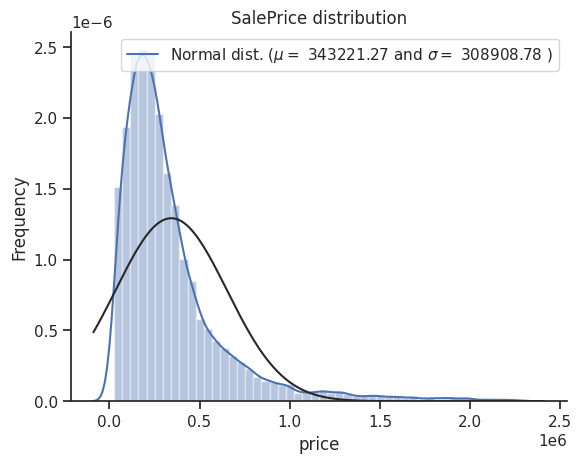

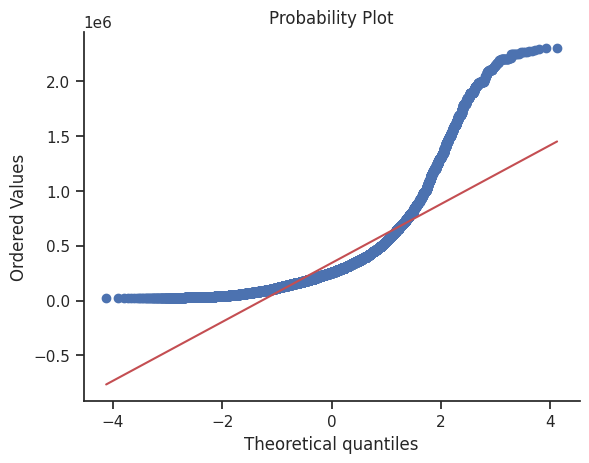

In [15]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(y['price'] , fit=norm);

(mu, sigma) = norm.fit(y['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y['price'], plot=plt)
plt.show()

<ipython-input-16-b92ca3c44820>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['price'] , fit=norm);



 mu = 5.40 and sigma = 0.35



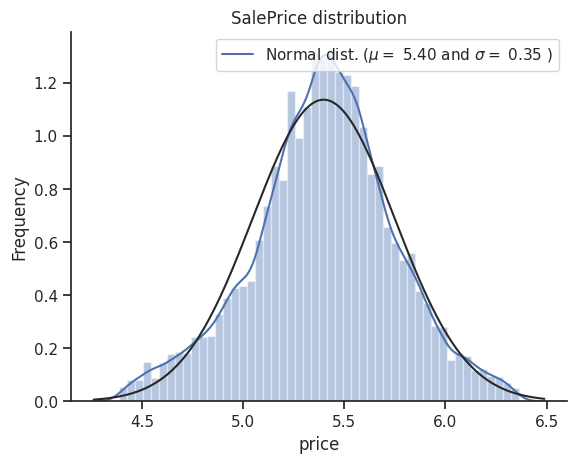

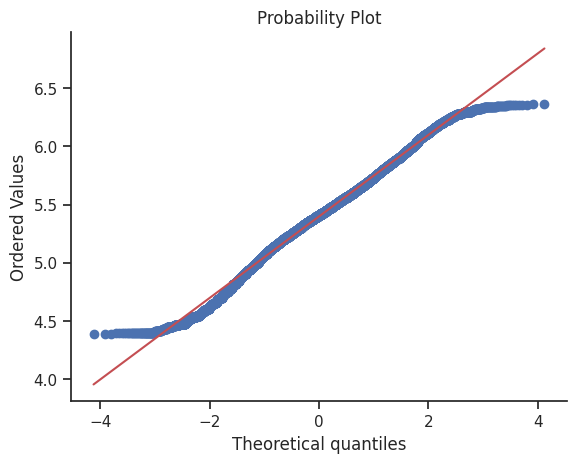

In [16]:
y['price'] = np.log10(y['price'])

sns.distplot(y['price'] , fit=norm);

(mu, sigma) = norm.fit(y['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(y['price'], plot=plt)
plt.show()

In [17]:
print("Skewness: %f" % y['price'].skew())
print("Kurtosis: %f" % y['price'].kurt())

Skewness: -0.144681
Kurtosis: 0.131112


In [ ]:
from sklearn.cluster import KMeans

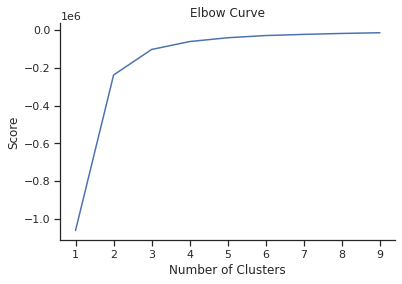

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['approximate_latitude']]
X_axis = X[['approximate_longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[['approximate_latitude','approximate_longitude']]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[['approximate_latitude','approximate_longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[['approximate_latitude','approximate_longitude']]) # Labels of each point

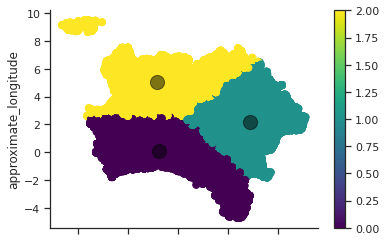

In [ ]:
X.plot.scatter(x = 'approximate_latitude', y = 'approximate_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=0)

In [49]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31762, 26) (5606, 26) (31762, 1) (5606, 1)


In [36]:
kfold = KFold(n_splits=5)

# **Baseline**

In [51]:
base = pipeline(xgb.XGBRegressor(objective='reg:squarederror', random_state=0))
base.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=100,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=0, ...),
                                            transformer=StandardScaler()))])

In [52]:
evaluate_model(base,'base', X_val, y_val)

R2 score (base): 72.74%
rmse (base): 0.184
mape (base): 2.546%


In [54]:
base2 = pipeline(KNeighborsRegressor())
base2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['energy_performance_category',
                                                   'ghg_category'])])),
                ('clf',
                 TransformedTargetRegressor(regressor=KNeighborsRegressor(),
                                            transformer=StandardScaler()))])

In [55]:
evaluate_model(base2,'base2', X_val, y_val)

R2 score (base2): 48.63%
rmse (base2): 0.253
mape (base2): 3.561%


In [56]:
base3 = pipeline(RandomForestRegressor())
base3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['energy_performance_category',
                                                   'ghg_category'])])),
                ('clf',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(),
                                            transformer=StandardScaler()))])

In [57]:
evaluate_model(base3,'base3', X_val, y_val)

R2 score (base3): 75.72%
rmse (base3): 0.174
mape (base3): 2.270%


In [29]:
base4 = pipeline(LinearRegression())
base4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['energy_performance_category',
                                                   'ghg_category'])])),
                ('clf',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [30]:
evaluate_model(base4,'base2', X_val, y_val)

R2 score (base2): 68.26%
rmse (base2): 0.199
mape (base2): 2.683%


In [31]:
residuals = (y_val - base4.predict(X_val))

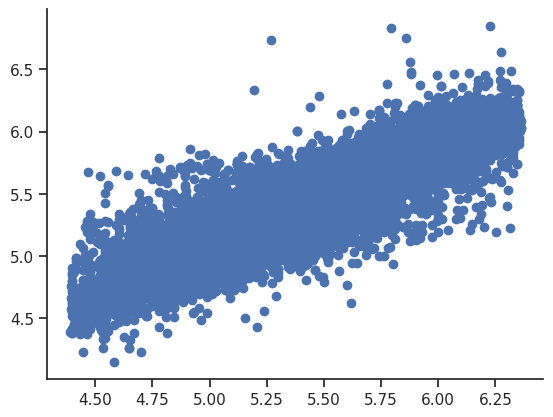

In [33]:
#y_train.corr(method='pearson', base4.predict(X_val))
plt.scatter(x=y_train, y=base4.predict(X_train))

In [62]:
base4.predict(X_val)

array([[5.29417795],
       [5.58990558],
       [5.32050964],
       ...,
       [5.43753353],
       [5.45483816],
       [4.8514468 ]])

In [63]:
base5 = pipeline(ElasticNet())
base5.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['energy_performance_category',
                                                   'ghg_category'])])),
                ('clf',
                 TransformedTargetRegressor(regressor=ElasticNet(),
                                            transformer=StandardScaler()))])

In [64]:
evaluate_model(base5,'base5', X_val, y_val)

R2 score (base5): -0.01%
rmse (base5): 0.353
mape (base5): 5.124%


In [65]:
base6 = pipeline(Lasso())
base6.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['energy_performance_category',
                                                   'ghg_category'])])),
                ('clf',
                 TransformedTargetRegressor(regressor=Lasso(),
                                            transformer=StandardScaler()))])

In [66]:
evaluate_model(base6,'base6', X_val, y_val)

R2 score (base6): -0.01%
rmse (base6): 0.353
mape (base6): 5.124%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

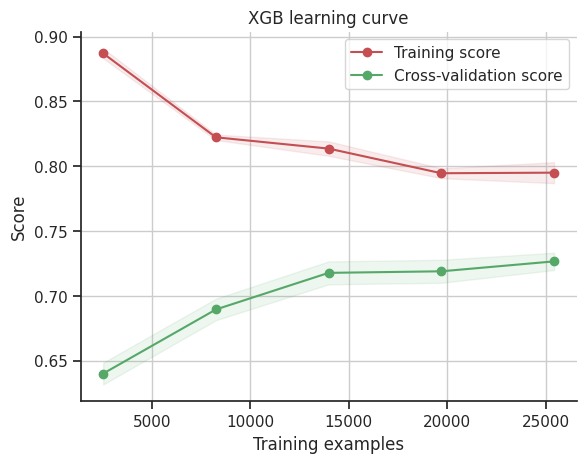

In [67]:
# XGB Regressor - Learning Curve 
plot_learning_curve(estimator=base,title="XGB learning curve",
                    X=X_train, y=y_train, cv=kfold)

# **Random Forest**

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12, 15, 18, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [74]:
# Create the random grid
random_grid = {
               'clf__regressor__n_estimators': n_estimators,
               'clf__regressor__max_features':max_features,
               'clf__regressor__max_depth': max_depth,
               'clf__regressor__min_samples_split': min_samples_split,
               'clf__regressor__min_samples_leaf': min_samples_leaf,
               'clf__regressor__bootstrap': bootstrap
}

In [ ]:
clf_rf = randomized_search_cv(pipeline(RandomForestRegressor(random_state=0)),
                              random_grid, kfold ,X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
rf = clf_rf.best_estimator_
rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate

In [75]:
rf = pipeline(RandomForestRegressor(bootstrap=False, min_samples_leaf=10, min_samples_split=12,
                                                                            random_state=0))
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   OrdinalEncoder(categories=[['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A'],
                                                                                              ['G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D',
                                                                                               'C',
                                                                                               'B',
                                                                                               'A']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['energy_performance_category',
                                                   'ghg_category'])])),
                ('clf',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(bootstrap=False,
                                                                            min_samples_leaf=10,
                                                                            min_samples_split=12,
                                                                            random_state=0),
                                            transformer=StandardScaler()))])

In [76]:
evaluate_model(rf,'RandomForestClassifier', X_val, y_val)

R2 score (RandomForestClassifier): 62.55%
rmse (RandomForestClassifier): 0.216
mape (RandomForestClassifier): 2.959%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

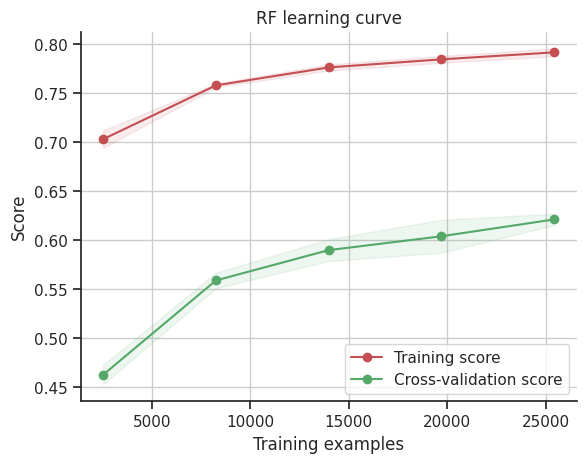

In [77]:
# Random Forest - Learning Curve 
plot_learning_curve(estimator=rf,title="RF learning curve",
                    X=X_train, y=y_train, cv=kfold)

# **XGBoost Regressor**

In [34]:
# Create the xgb grid
xgb_grid = {
               'clf__regressor__n_estimators': np.arange(100, 2500, 100),
               'clf__regressor__max_depth': np.arange(1, 20, 1),
               'clf__regressor__eta': [0.3, 0.2, 0.1, 0.01, 0.001],
               'clf__regressor__subsample': np.arange(0, 1, 0.01),
               'clf__regressor__colsample_bytree': np.arange(0, 1, 0.01),
               'clf__regressor__learning_rate' : [0.0001, 0.001, 0.01, 0.1]
}

In [37]:
clf_xgb = randomized_search_cv(pipeline(xgb.XGBRegressor(objective='reg:squarederror', random_state=0)),
                              xgb_grid, kfold ,X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [38]:
best_xgb = clf_xgb.best_estimator_
best_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['size',
                                                   'energy_performance_value',
                                                   'nb_rooms', 'nb_bedrooms',
                                                   'nb_bathrooms',
                                                   'nb_parking_places',
                                                   'nb_boxes', 'nb_terraces',
                                                   'nb_photos',
                                                   'approximate_latitude',
                                                   'approximate_longitude',
                                                   'floor'...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.01,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=11,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=2300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None, ...),
                                            transformer=StandardScaler()))])

In [39]:
evaluate_model(best_xgb,'XGBRegressor', X_val, y_val)

R2 score (XGBRegressor): 79.41%
rmse (XGBRegressor): 0.160
mape (XGBRegressor): 2.143%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

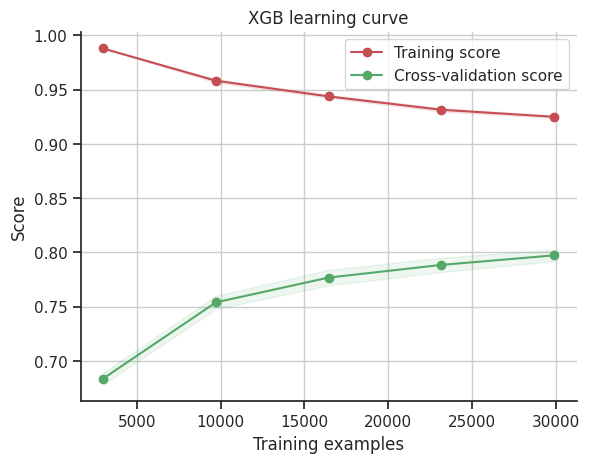

In [72]:
# XGB Regressor - Learning Curve 
plot_learning_curve(estimator=best_xgb,title="XGB learning curve",
                    X=X, y=y, cv=kfold)

# **ANN**

In [79]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [81]:
def normalisation(X, y):
    numeric_transformer  = Pipeline(steps=[
                         ('imputer', SimpleImputer(strategy='median')),
                         ('robust_scaler', RobustScaler())])
        
    categorical_transformer  = Pipeline(steps=[
                         ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
                         ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocessor = ColumnTransformer(
      transformers=[
                 ('num', numeric_transformer, numeric_features),
                 ('cat', categorical_transformer, categorical_features)])
    
    y_scaler = RobustScaler()
    y = y_scaler.fit_transform(y)
    return preprocessor.fit_transform(X).toarray(), y

In [82]:
X_ann, y_ann = normalisation(X, y)

In [83]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_ann, y_ann, test_size=0.2, random_state=0)

In [85]:
# create a function that returns a model, taking as parameters things you
# want to verify using cross-valdiation and model selection
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=24, activation='relu', input_dim=X_train_ann.shape[1]))
    model.add(Dense(units=12, activation='relu', input_dim=X_train_ann.shape[1]))
    model.add(Dense(units=6, activation='relu', input_dim=X_train_ann.shape[1]))
    model.add(Dense(units=3, activation='relu', input_dim=X_train_ann.shape[1]))
    model.add(Dense(units=1, activation='linear', input_dim=X_train_ann.shape[1]))
    model.compile(loss='mse',optimizer=Adam(learning_rate=1e-5), metrics=["mape"])

    return model

# wrap the model using the function you created
clf = KerasRegressor(model=create_model,verbose=1, epochs=10, validation_split=0.1, batch_size=10)

# fit the model
clf.fit(X_train_ann, y_train_ann)

Epoch 1/10
2691/2691 [==============================] - 21s 5ms/step - loss: 4.1494 - mape: 171.7973 - val_loss: 0.6448 - val_mape: 120.0967
Epoch 2/10
2691/2691 [==============================] - 12s 4ms/step - loss: 0.7104 - mape: 129.8388 - val_loss: 0.6328 - val_mape: 129.5109
Epoch 3/10
2691/2691 [==============================] - 12s 4ms/step - loss: 3.4487 - mape: 169.7079 - val_loss: 0.6241 - val_mape: 136.1660
Epoch 4/10
2691/2691 [==============================] - 11s 4ms/step - loss: 0.9958 - mape: 148.8876 - val_loss: 0.6613 - val_mape: 140.0928
Epoch 5/10
2691/2691 [==============================] - 12s 4ms/step - loss: 3.8970 - mape: 196.1708 - val_loss: 0.6112 - val_mape: 136.2780
Epoch 6/10
2691/2691 [==============================] - 11s 4ms/step - loss: 1.5792 - mape: 173.9126 - val_loss: 0.7579 - val_mape: 150.7517
Epoch 7/10
2691/2691 [==============================] - 12s 4ms/step - loss: 2.0618 - mape: 158.3091 - val_loss: 0.5881 - val_mape: 145.0608
Epoch 8/10
26

KerasRegressor(
	model=<function create_model at 0x7fab751aee50>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=10
)

In [86]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 14.2 MB/s eta 0:00:00


In [87]:
import keras_tuner

In [88]:
# create a function that returns a model, taking as parameters things you
# want to verify using cross-valdiation and model selection
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units',
                                 min_value=2,
                                 max_value=128,
                                 step=2),
                    activation='relu', input_dim=X_train_ann.shape[1]))
    model.add(Dense(units=1, activation='linear', input_dim=X_train_ann.shape[1]))
    model.compile(loss='mse',
                  optimizer=Adam(hp.Choice('learning_rate',
                                           values=[1e-2, 1e-3, 1e-4, 1e-5])),
                  metrics=["mape"])

    return model

In [89]:
tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_mape",
    max_epochs=81,
    factor=3,
    hyperband_iterations=1,
    seed=None,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    directory='my_dir',
    project_name="price_prediction"
)

In [ ]:
tuner.search(
         x=X_train_ann,
         y=y_train_ann,
         validation_data=(X_test_ann, y_test_ann),
         batch_size=32,
         epochs=10)

Trial 162 Complete [00h 00m 30s]
val_mape: 220.466796875

Best val_mape So Far: 152.00450134277344
Total elapsed time: 00h 52m 00s

Search: Running Trial #163

Value             |Best Value So Far |Hyperparameter
122               |58                |units
1e-05             |1e-05             |learning_rate
9                 |3                 |tuner/epochs
3                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
1                 |0                 |tuner/round
0145              |None              |tuner/trial_id

Epoch 4/9
927/935 [============================>.] - ETA: 0s - loss: 11.3266 - mape: 257.7449

In [2]:
tuner.results_summary()

# **PREDICTION**

In [40]:
X_test = pd.read_csv('/content/X_test_BEhvxAN.csv')

In [41]:
X_test = X_test.set_index('id_annonce')

In [71]:
pred_df = pd.DataFrame(best_xgb.predict(X_test), index=X_test.index, columns=['prediction'])

In [72]:
pred_df

,prediction
id_annonce,
35160615,5.310048
35830639,5.919526
36016657,5.457099
35759225,5.332512
35252229,5.643137
...,...
36052217,5.728671
35823719,5.422023
35793053,5.496173


In [73]:
pred_df['prediction'] = 10**(pred_df['prediction'])

In [74]:
pred_df

,prediction
id_annonce,
35160615,204196.406250
35830639,830855.750000
36016657,286483.062500
35759225,215036.359375
35252229,439679.781250
...,...
36052217,535390.437500
35823719,264255.062500
35793053,313453.343750


In [75]:
result_df = X_test.join(pred_df)

<Axes: xlabel='prediction', ylabel='Density'>

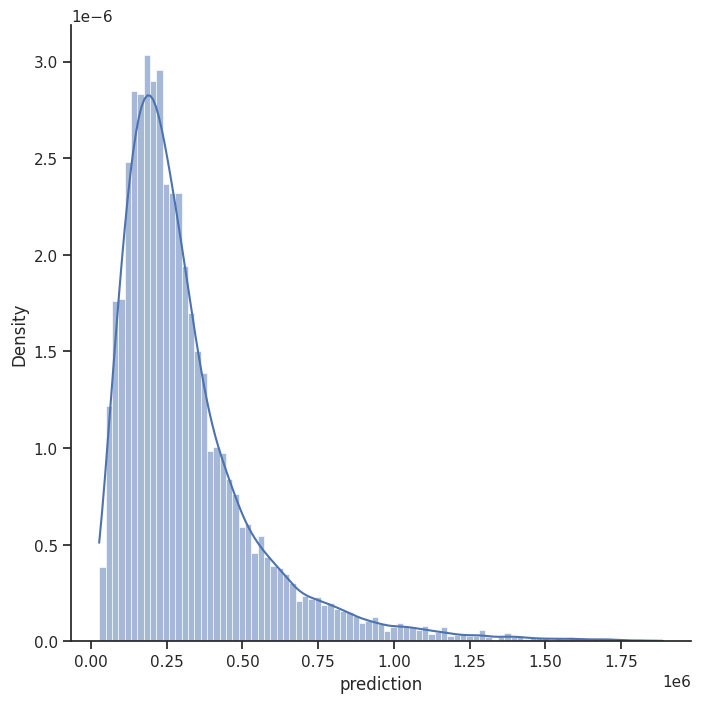

In [76]:
plt.figure(figsize=(8,8))
sns.histplot(data=result_df, x='prediction', kde=True, stat="density")

In [ ]:
from google.colab import files
pred_df.to_csv('submission.csv') 
files.download('submission.csv')